# WeatherPy

---

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from environs import Env

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
import time

# Load Environmental Variables
env = Env()
env.read_env("../.env")
weather_api_key = env("WEATHER_API_KEY", default=None)


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
kept_lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        kept_lat_lngs.append(lat_lng)

    time.sleep(.1)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Empty list for city information
city_data = []

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the request and get the JSON response
        response = requests.get(city_url)
        response.raise_for_status()  # Raises an exception for bad responses
        city_weather = response.json()

        # Check if the required data exists in the response
        if 'coord' in city_weather and 'main' in city_weather and 'wind' in city_weather and 'sys' in city_weather:
            # Obtain the relevant city data from the response
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the City information into city_data list
            city_data.append({"City": city,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"City {city} does not have complete data. Skipping...")

    # If a request error is experienced, skip the city
    except requests.RequestException as e:
        print(f"Error while requesting city {city}: {e}")

    # Pause to avoid rate limiting
    #time.sleep(.05)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Show

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saipan
Processing Record 2 of Set 1 | yagry
Error while requesting city yagry: 404 Client Error: Not Found for url: https://api.openweathermap.org/data/2.5/weather?q=yagry&appid=7674d8f0bc91892eb6a623bfec3cb09f&units=imperial
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | walvis bay
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | chonchi
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | terra santa
Processing Record 13 of Set 1 | taiohae
Error while requesting city taiohae: 404 Client Error: Not Found for url: https://api.openweathermap.org/data/2.5/weather?q=taiohae&appid=7674d8f0bc91892eb6a623bfec3cb09f&units=imperial
Proces

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saipan,15.1355,145.7010,81.30,83,40,5.75,MP,1727716025
1,port-aux-francais,-49.3500,70.2167,35.33,90,100,34.23,TF,1727716025
2,edinburgh of the seven seas,-37.0676,-12.3116,56.53,85,58,21.45,SH,1727716025
3,walvis bay,-22.9575,14.5053,59.52,57,0,22.88,NA,1727715860
4,blackmans bay,-43.0167,147.3167,55.72,65,93,1.99,AU,1727716025


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,81.30,83,40,5.75,MP,1727716025
1,port-aux-francais,-49.3500,70.2167,35.33,90,100,34.23,TF,1727716025
2,edinburgh of the seven seas,-37.0676,-12.3116,56.53,85,58,21.45,SH,1727716025
3,walvis bay,-22.9575,14.5053,59.52,57,0,22.88,NaN,1727715860
4,blackmans bay,-43.0167,147.3167,55.72,65,93,1.99,AU,1727716025


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

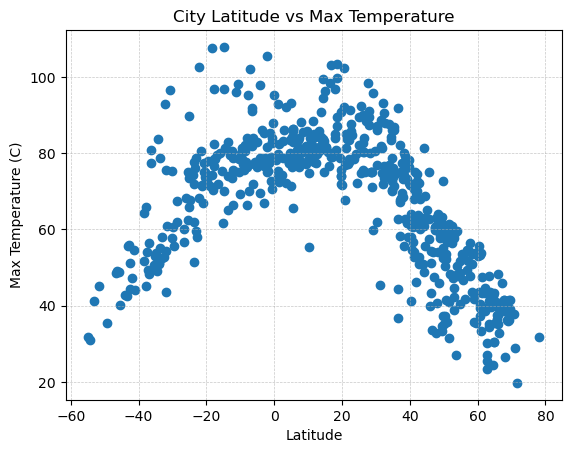

In [12]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']

# Create the figure
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

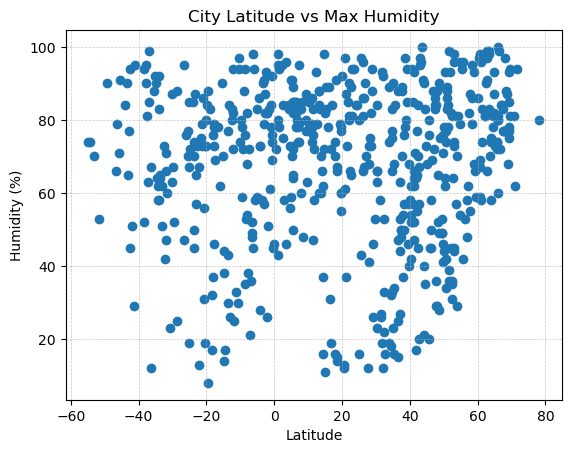

In [13]:
# Build the scatter plots for latitude vs. humidity
y = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Max Humidity")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

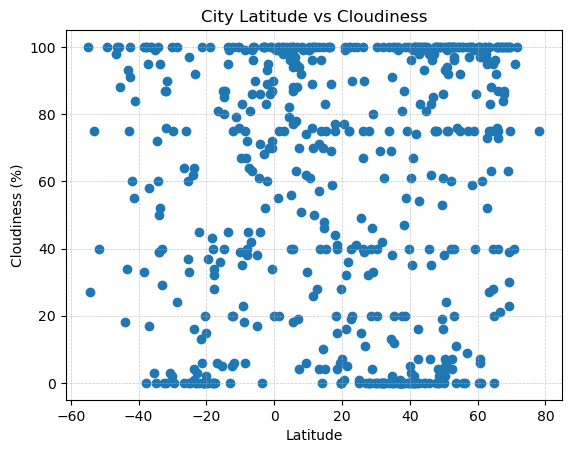

In [14]:
# Build the scatter plots for latitude vs. cloudiness
y = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

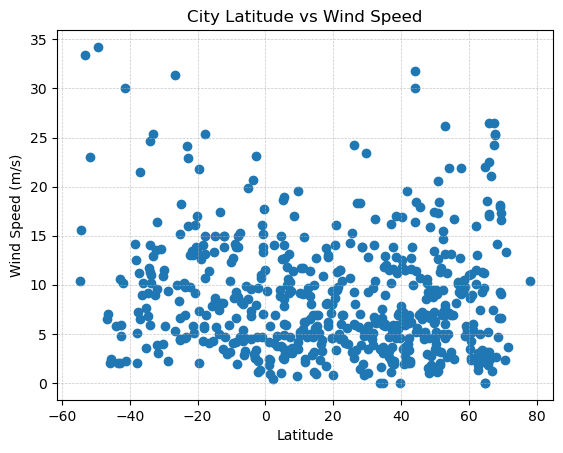

In [15]:
# Build the scatter plots for latitude vs. wind speed
y = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def cool_linear_regression_function(hemisphere_df, param_choice, cool_ylabel):
    # set parameters
    x = hemisphere_df['Lat']
    y = hemisphere_df[param_choice]
    # get all the needed data
    slope, intercept, r, p, std_err = stats.linregress(x,y)
    print(f"The r² value is {round(r**2,3)}")

    # Plot data points
    plt.scatter(x, y, label='City data')

    # Apply our model
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, color='orange', label='Regression line')
    
    # Set labels
    plt.title(f"City Latitude VS {param_choice}")
    plt.xlabel("Latitude")
    plt.ylabel(cool_ylabel)

    # Add the equation used for the regression line
    equation_text = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.text(x.min(),y.max(), equation_text, fontsize=12, color='red')
    
    plt.legend()

    plt.show()



In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,81.30,83,40,5.75,MP,1727716025
9,aasiaat,68.7098,-52.8699,36.10,87,100,4.65,GL,1727716026
13,tiksi,71.6872,128.8694,19.71,94,100,3.67,RU,1727716027
14,iqaluit,63.7506,-68.5145,43.70,70,83,3.00,CA,1727716027
16,tarnova,46.3167,21.8000,51.15,58,83,7.25,RO,1727716027


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,35.33,90,100,34.23,TF,1727716025
2,edinburgh of the seven seas,-37.0676,-12.3116,56.53,85,58,21.45,SH,1727716025
3,walvis bay,-22.9575,14.5053,59.52,57,0,22.88,NaN,1727715860
4,blackmans bay,-43.0167,147.3167,55.72,65,93,1.99,AU,1727716025
5,puerto natales,-51.7236,-72.4875,45.05,53,40,23.02,CL,1727715919


###  Temperature vs. Latitude Linear Regression Plot

The r² value is 0.697


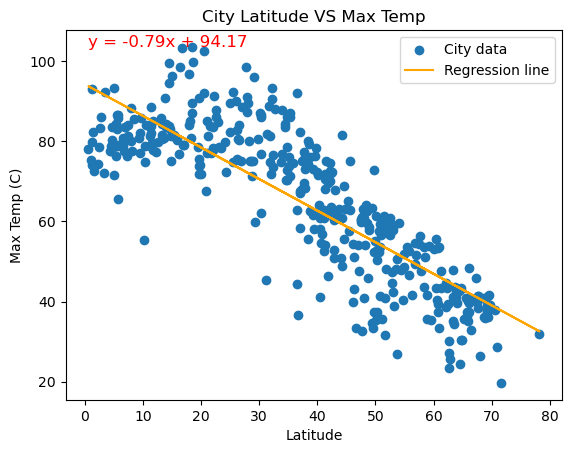

In [19]:
# Linear regression on Northern Hemisphere
cool_linear_regression_function(northern_hemi_df, 'Max Temp', 'Max Temp (F)')

The r² value is 0.546


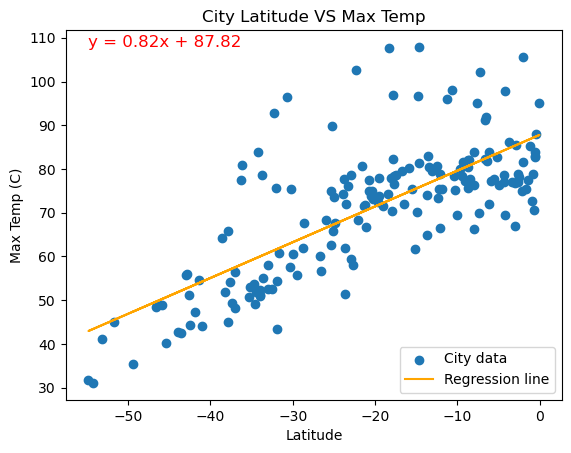

In [20]:
# Linear regression on Southern Hemisphere
cool_linear_regression_function(southern_hemi_df, 'Max Temp', 'Max Temp (F)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r² value is 0.003


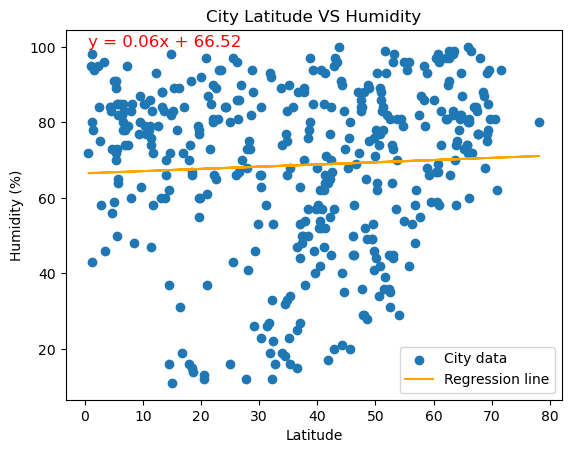

In [27]:
# Northern Hemisphere
cool_linear_regression_function(northern_hemi_df, 'Humidity', 'Humidity (%)')

The r² value is 0.005


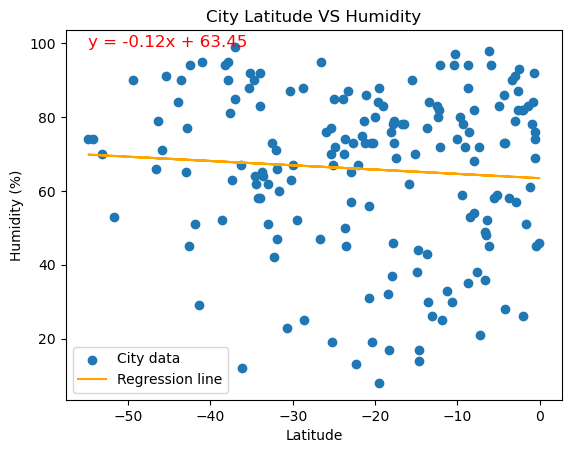

In [28]:
# Southern Hemisphere
cool_linear_regression_function(southern_hemi_df, "Humidity", "Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r² value is 0.003


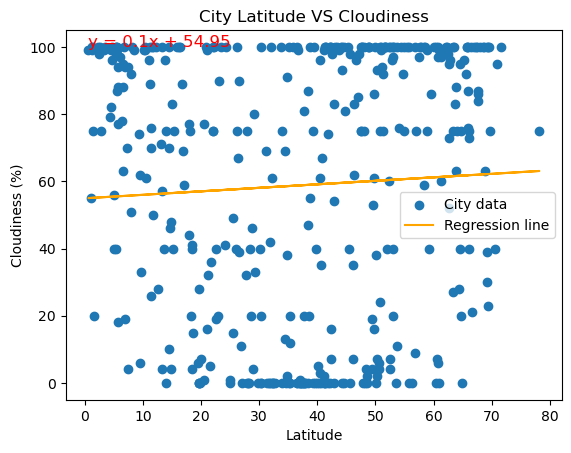

In [29]:
# Northern Hemisphere
cool_linear_regression_function(northern_hemi_df, 'Cloudiness', 'Cloudiness (%)')

The r² value is 0.001


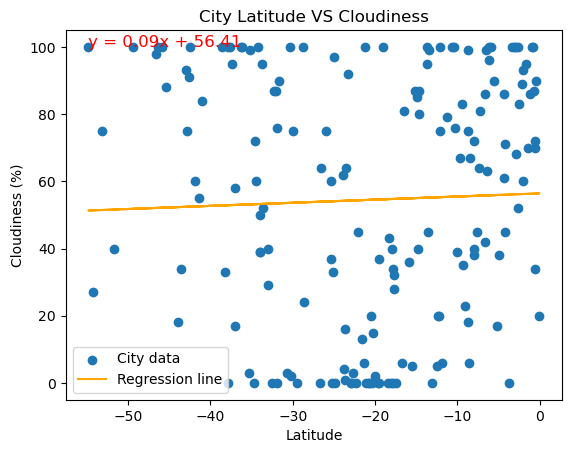

In [30]:
# Southern Hemisphere
cool_linear_regression_function(southern_hemi_df, 'Cloudiness', 'Cloudiness (%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r² value is 0.021


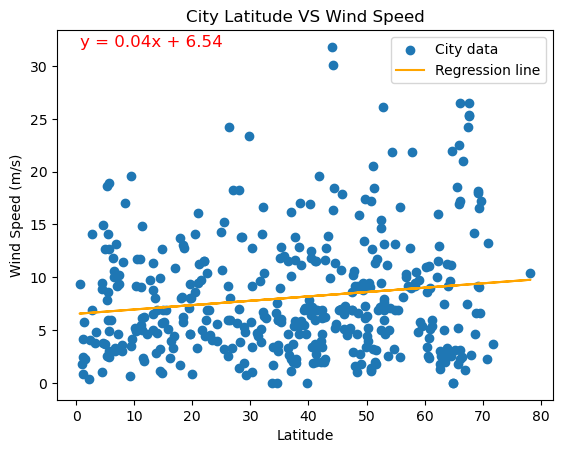

In [25]:
# Northern Hemisphere
cool_linear_regression_function(northern_hemi_df, 'Wind Speed', 'Wind Speed (m/s)')

The r² value is 0.026


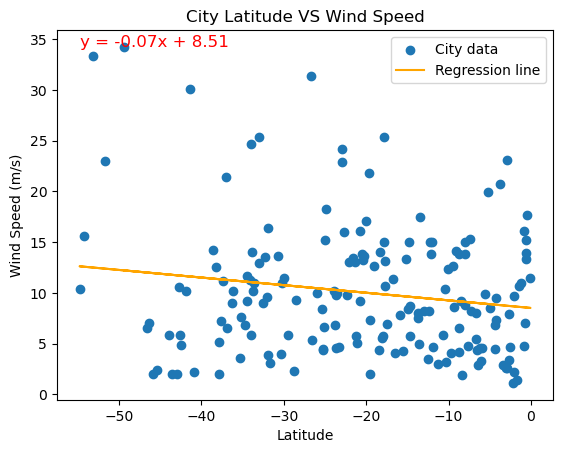

In [26]:
# Southern Hemisphere
cool_linear_regression_function(southern_hemi_df, "Wind Speed", "Wind Speed (m/s)")

## Discussion

1. **City Latitude vs Max Temperature (F)**
Our first figure shows that the temperature peaks near the equator and decreases as you approach the poles. This distribution is relatively symetric.
2. **City Latitude vs Humidity (%)**
Similarly to temperature humidity is the highest near the equator. Humidity has a large amount of variability throughout the map. 
3. **City Latitude vs Wind Speed**
Most cities reported wind speeds under 10 m/s though the occasional outlier exceeds 20 m/s. There is a trend of higher wind speeds at higher latitudes. 